# Analysis of the Popularity of Different Programming Languages over Time

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

## Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv',names= ['DATE', 'TAG', 'POSTS'],header=0)

#### Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


#### Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2468, 3)

#### Count the number of entries in each column of the dataframe

In [3]:
df["POSTS"].sum()

12093292

#### Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [4]:
new_df = df.groupby('TAG').sum()
new_df.sort_values("POSTS", ascending= False)

,POSTS
TAG,
javascript,2504120
python,2151373
java,1902173
c#,1597574
php,1459853
c++,796867
r,494206
c,398010
swift,328883




#### How many months of data exist per language? Which language had the fewest months with an entry? 


In [5]:
new_df = df.groupby('TAG').count()

In [6]:
new_df

,DATE,POSTS
TAG,,
assembly,180,180
c,180,180
c#,181,181
c++,180,180
delphi,180,180
go,165,165
java,180,180
javascript,180,180
perl,180,180


## Data Cleaning

#### We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [7]:
df.DATE = pd.to_datetime(df.DATE)


In [8]:
print(type(df["DATE"]))

<class 'pandas.core.series.Series'>


## Data Manipulation



#### What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [9]:
reshaped_df = df.pivot(index="DATE",columns="TAG",values="POSTS")
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [10]:
reshaped_df.shape

(181, 14)

In [11]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-03-01,180.0,1265.0,4907.0,2571.0,143.0,639.0,5535.0,10534.0,95.0,2281.0,15539.0,3835.0,301.0,1366.0
2023-04-01,197.0,1186.0,3847.0,1966.0,121.0,515.0,4492.0,8306.0,56.0,1941.0,12447.0,3104.0,220.0,1095.0
2023-05-01,176.0,1051.0,3845.0,1783.0,114.0,423.0,4197.0,7800.0,54.0,1976.0,11821.0,2866.0,256.0,1002.0
2023-06-01,157.0,894.0,3828.0,1825.0,118.0,523.0,4320.0,7586.0,54.0,1922.0,11342.0,2677.0,228.0,1141.0
2023-07-01,175.0,984.0,4102.0,2021.0,103.0,547.0,4496.0,7965.0,73.0,1943.0,12037.0,2438.0,231.0,1211.0


In [12]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

#### Count the number of entries per programming language. Why might the number of entries be different? 

In [13]:
reshaped_df = reshaped_df.fillna(0)

In [14]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,180.0,1265.0,4907.0,2571.0,143.0,639.0,5535.0,10534.0,95.0,2281.0,15539.0,3835.0,301.0,1366.0
2023-04-01,197.0,1186.0,3847.0,1966.0,121.0,515.0,4492.0,8306.0,56.0,1941.0,12447.0,3104.0,220.0,1095.0
2023-05-01,176.0,1051.0,3845.0,1783.0,114.0,423.0,4197.0,7800.0,54.0,1976.0,11821.0,2866.0,256.0,1002.0


## Data Visualisaton with with Matplotlib


#### Plot a single programming language (e.g., java) on a chart.

In [17]:
import matplotlib.pyplot as plt

In [18]:
reshaped_df["java"]

DATE
2008-07-01       0.0
2008-08-01     222.0
2008-09-01    1129.0
2008-10-01    1149.0
2008-11-01     956.0
               ...  
2023-03-01    5535.0
2023-04-01    4492.0
2023-05-01    4197.0
2023-06-01    4320.0
2023-07-01    4496.0
Name: java, Length: 181, dtype: float64

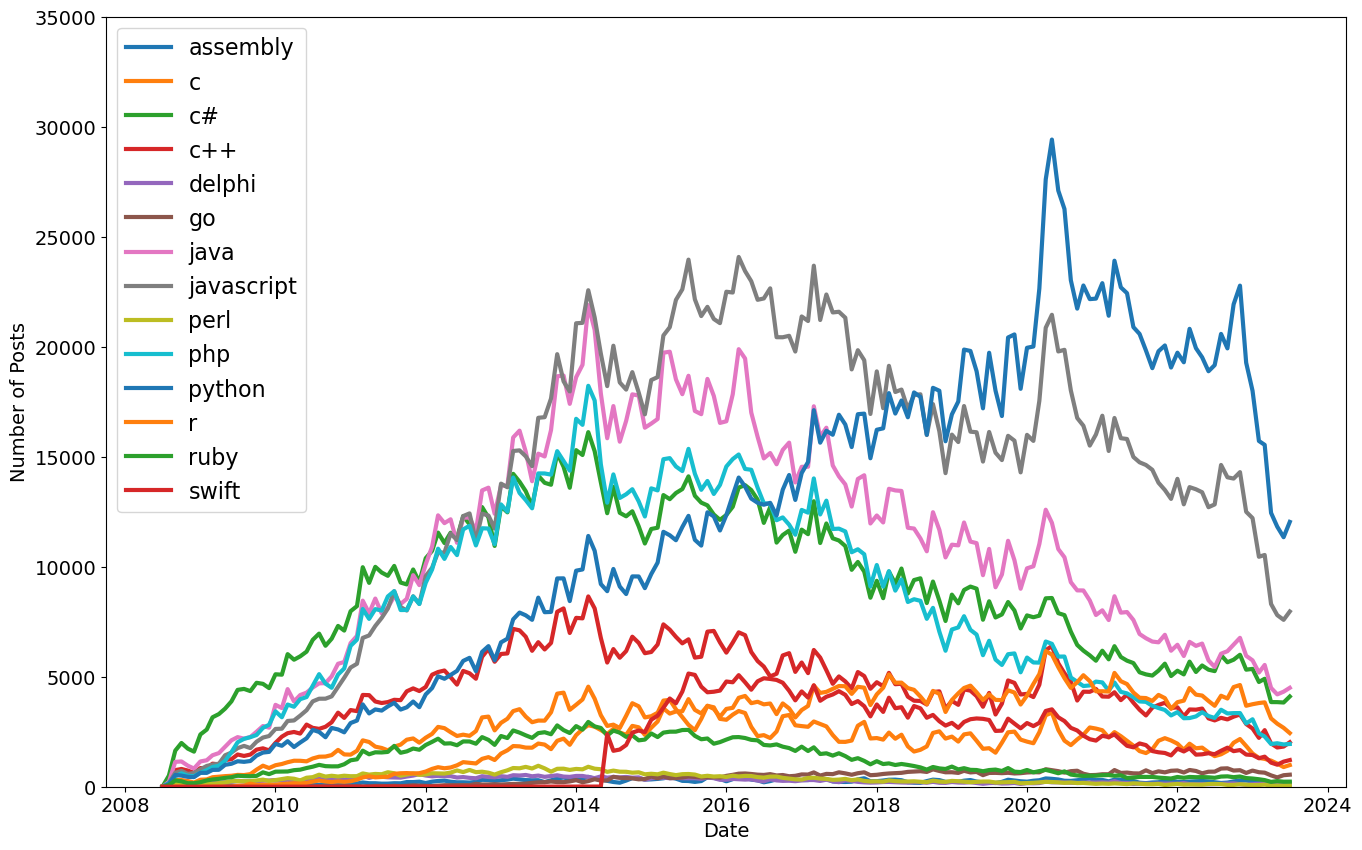

In [19]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

#### Show two line (e.g. for Java and Python) on the same chart.

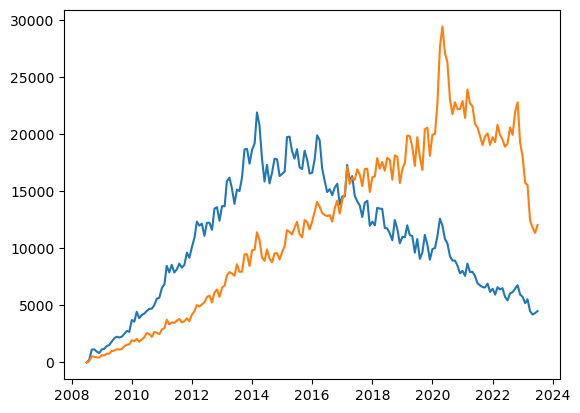

In [20]:
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)



# Smoothing out Time Series Data



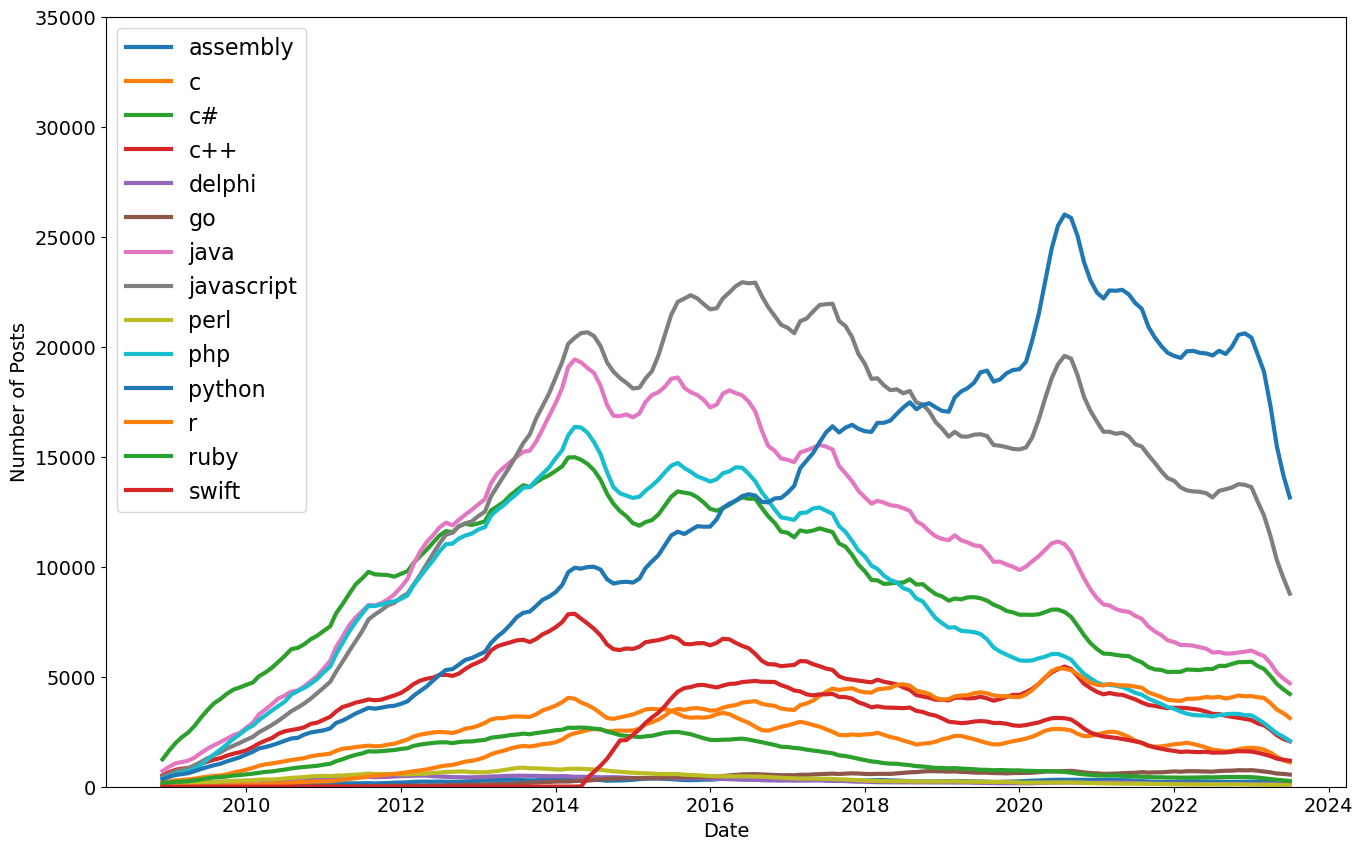

In [21]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

## Conclusion 
#### We can see that python is gaining popularity over time and is by far the most used language nowadays! 